**Import Liberaries**

In [3]:
!pip install langdetect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 13.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993223 sha256=3dbb4b18b362fc64a19bd99e16c6224db4e992d8d2755ba81e3af9f8b664b9e7
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect


In [184]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import nltk
from nltk.stem import SnowballStemmer
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer

**Loading Dataset**

In [185]:
df = pd.read_csv('spam.csv', encoding='latin1')
df.head()


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


**Delete Columns**

In [186]:
new_df = df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)
new_df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


**Assigning Labels**

In [187]:
y = df[["v1"]]

In [188]:
x = df[["v2"]]

**Checking Missing Values**

In [189]:
new_df.isnull().sum()

v1    0
v2    0
dtype: int64

<Axes: >

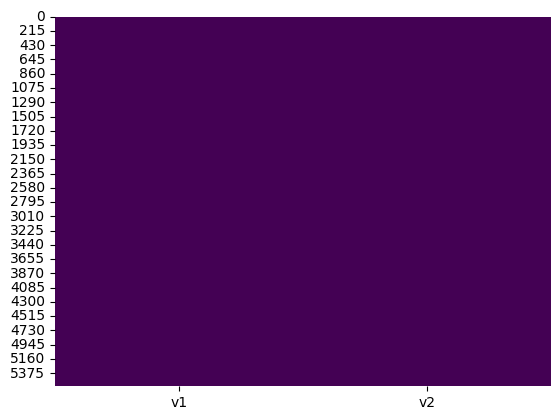

In [190]:
sb.heatmap(new_df.isnull(),cbar=False,cmap='viridis')

**Data Cleaning**

In [191]:
def Data_Clean():
  print("Processing...")

  # replacing na values in college with No college
  df["v2"].fillna("No Statement.", inplace = True)

Data_Clean()
print("Cleaning over..")

Processing...
Cleaning over..


In [192]:
new_df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [193]:
y.head()

,v1
0,ham
1,ham
2,spam
3,ham
4,ham


In [194]:
x.head()

,v2
0,"Go until jurong point, crazy.. Available only ..."
1,Ok lar... Joking wif u oni...
2,Free entry in 2 a wkly comp to win FA Cup fina...
3,U dun say so early hor... U c already then say...
4,"Nah I don't think he goes to usf, he lives aro..."


**Convert Messages to Lower case**

In [195]:
new_df['v2'] = new_df['v2'].str.lower() # Converting so it does not take AM and am as different.
x = new_df['v2']
x

0       go until jurong point, crazy.. available only ...
1                           ok lar... joking wif u oni...
2       free entry in 2 a wkly comp to win fa cup fina...
3       u dun say so early hor... u c already then say...
4       nah i don't think he goes to usf, he lives aro...
                              ...                        
5567    this is the 2nd time we have tried 2 contact u...
5568                will ì_ b going to esplanade fr home?
5569    pity, * was in mood for that. so...any other s...
5570    the guy did some bitching but i acted like i'd...
5571                           rofl. its true to its name
Name: v2, Length: 5572, dtype: object

**Removing Stop Words**

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('all')

stopwords = set(stopwords.words('english'))

# removing words like is, are, am known as stopwords etc

filtered_sentence = []
for w in new_df['v2']:
    if w not in stopwords:
        filtered_sentence.append(w)

new_df['v2'] = filtered_sentence
x = new_df['v2']
x

**Performing Tokenization**

In [197]:
new_df['v2'] = new_df['v2'].apply(lambda x: word_tokenize(x))

x = new_df['v2']
x

0       [go, until, jurong, point, ,, crazy, .., avail...
1                [ok, lar, ..., joking, wif, u, oni, ...]
2       [free, entry, in, 2, a, wkly, comp, to, win, f...
3       [u, dun, say, so, early, hor, ..., u, c, alrea...
4       [nah, i, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [this, is, the, 2nd, time, we, have, tried, 2,...
5568     [will, ì_, b, going, to, esplanade, fr, home, ?]
5569    [pity, ,, *, was, in, mood, for, that, ., so, ...
5570    [the, guy, did, some, bitching, but, i, acted,...
5571                  [rofl, ., its, true, to, its, name]
Name: v2, Length: 5572, dtype: object

**Used PorterStemmer**

In [198]:
from nltk.stem import PorterStemmer

# Create an instance of the PorterStemmer
stemmer = PorterStemmer()
new_df['v2'] = new_df['v2'].apply(lambda tokens: ' '.join(stemmer.stem(token) for token in tokens))

# Now, 'new_df['v2']' will contain the stemmed versions of the words in the 'v2' column.

x = new_df['v2']
x


0       go until jurong point , crazi .. avail onli in...
1                           ok lar ... joke wif u oni ...
2       free entri in 2 a wkli comp to win fa cup fina...
3       u dun say so earli hor ... u c alreadi then sa...
4       nah i do n't think he goe to usf , he live aro...
                              ...                        
5567    thi is the 2nd time we have tri 2 contact u. u...
5568                   will ì_ b go to esplanad fr home ?
5569    piti , * wa in mood for that . so ... ani othe...
5570    the guy did some bitch but i act like i 'd be ...
5571                            rofl . it true to it name
Name: v2, Length: 5572, dtype: object

**Now apply encoding methods**

**1- Bag Of Words**

In [169]:
! pip install gensim

In [199]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer
import nltk.corpus
from nltk.tokenize import word_tokenize
from gensim.models.word2vec import Word2Vec
from sklearn.pipeline import Pipeline

In [200]:
# creating word matrix with bag of word technique
countV = CountVectorizer()
x_bow = countV.fit_transform(df['v2'].values)

# print(countV)
print(x_bow)

def countVectorizer_matrix():

    #vocab size
    x.shape

    #check vocabulary using below command
    print(countV.vocabulary_)

    #get feature names
    print(countV.get_feature_names()[:25])

# countVectorizer_matrix()


  (0, 3550)	1
  (0, 8030)	1
  (0, 4350)	1
  (0, 5920)	1
  (0, 2327)	1
  (0, 1303)	1
  (0, 5537)	1
  (0, 4087)	1
  (0, 1751)	1
  (0, 3634)	1
  (0, 8489)	1
  (0, 4476)	1
  (0, 1749)	1
  (0, 2048)	1
  (0, 7645)	1
  (0, 3594)	1
  (0, 1069)	1
  (0, 8267)	1
  (1, 5504)	1
  (1, 4512)	1
  (1, 4318)	1
  (1, 8392)	1
  (1, 5533)	1
  (2, 4087)	1
  (2, 3358)	1
  :	:
  (5570, 4218)	1
  (5570, 8313)	1
  (5570, 1084)	1
  (5570, 4615)	1
  (5570, 7039)	1
  (5570, 3308)	1
  (5570, 7627)	1
  (5570, 1438)	1
  (5570, 5334)	1
  (5570, 2592)	1
  (5570, 8065)	1
  (5570, 1778)	1
  (5570, 7049)	1
  (5570, 2892)	1
  (5570, 3470)	1
  (5570, 1786)	1
  (5570, 3687)	1
  (5570, 4161)	1
  (5570, 903)	1
  (5570, 1546)	1
  (5571, 7756)	1
  (5571, 5244)	1
  (5571, 4225)	2
  (5571, 7885)	1
  (5571, 6505)	1


**TF_IDF**

In [201]:
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer

# Assuming 'x' is a list or Series containing the text data

# Step 1: Use TfidfVectorizer to convert text data into numerical feature vectors
tfidf_vectorizer = TfidfVectorizer()
train_tfidf_vectors = tfidf_vectorizer.fit_transform(x)




In [202]:
def tfidf_matrix():
    train_tfidf_vectors.shape
    #get train data feature names
    print(train_tfidf_vectors.A[:10])

tfidf_ngram = TfidfVectorizer(stop_words='english',ngram_range=(1,4),use_idf = True,smooth_idf = True)
tfidf_matrix()

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


**EDA**

In [203]:
# Shape of each set
print("Shape of x data: ", x.shape)
print("Shape of y data: ", y.shape)

Shape of x data:  (5572,)
Shape of y data:  (5572, 1)


In [204]:
new_df['v2'].describe()

count                         5572
unique                        5157
top       sorri , i 'll call later
freq                            30
Name: v2, dtype: object

In [205]:
new_df['v1'].describe()

count     5572
unique       2
top        ham
freq      4825
Name: v1, dtype: object

In [206]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


**DataSet Splitting(BOW)**

In [207]:
from sklearn.model_selection import train_test_split
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_bow, y, test_size = 0.30)
# print(x_train)
# print(x_test)
# print(y_train)
print(y_test1)

        v1
3968   ham
1459  spam
5216   ham
3243   ham
4115   ham
...    ...
4760   ham
2737   ham
3222   ham
3314  spam
1363   ham

[1672 rows x 1 columns]


In [208]:
# Shape of each set
print("Shape of train DATA: ", x_train1.shape)
print("Shape of test DATA: ", x_test1.shape)

Shape of train DATA:  (3900, 8672)
Shape of test DATA:  (1672, 8672)


**Data Splitting for TF_IDF**

In [209]:
from sklearn.model_selection import train_test_split
x_train2, x_test2, y_train2, y_test2 = train_test_split(train_tfidf_vectors, y, test_size = 0.30)
# print(x_train)
# print(x_test)
# print(y_train)
print(y_test2)

       v1
3025  ham
1234  ham
1212  ham
3242  ham
3203  ham
...   ...
3666  ham
3030  ham
4257  ham
585   ham
3655  ham

[1672 rows x 1 columns]


In [210]:
# Shape of each set
print("Shape of train DATA: ", x_train2.shape)
print("Shape of test DATA: ", x_test2.shape)

Shape of train DATA:  (3900, 7421)
Shape of test DATA:  (1672, 7421)


**Applying Models**

In [211]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import learning_curve,  GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve

**1- Random Forest (Bag Of Words)**

In [212]:
# Applying Random Forest

# rf_classifier = Pipeline([('rfCV', countV),('rf_clf', RandomForestClassifier(n_estimators=300,n_jobs=2))])
rf_classifier = RandomForestClassifier(n_estimators=300, n_jobs=2)
rf_classifier.fit(x_train1, y_train1)

<ipython-input-212-b3a4e30c8c91>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(x_train1, y_train1)


RandomForestClassifier(n_estimators=300, n_jobs=2)

In [213]:
# Predicting
y_pred_train = rf_classifier.predict(x_test1)
y_pred_train

array(['ham', 'ham', 'ham', ..., 'ham', 'spam', 'ham'], dtype=object)

In [214]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test1, y_pred_train)
print(cm)

[[1430    2]
 [  36  204]]


**Evaluate The Model**

In [215]:
! pip install -U scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 34.1 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [216]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

print("\n\n Accuracy Score: ", accuracy_score(y_test1, y_pred_train)*100)

print("\n____________________________________________________________________\n")
print("Classification Report of Random Forest: \n\n", classification_report(y_test1, y_pred_train))



 Accuracy Score:  97.72727272727273

____________________________________________________________________

Classification Report of Random Forest: 

               precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1432
        spam       0.99      0.85      0.91       240

    accuracy                           0.98      1672
   macro avg       0.98      0.92      0.95      1672
weighted avg       0.98      0.98      0.98      1672



**2- SVM (TF-IDF)**

In [217]:
# Applying SVM

svm_classifier = SVC(kernel = 'linear', random_state = 0)
# svm_classifier = Pipeline([('svm_tfidf',tfidf_ngram),('svm_clf',svm.LinearSVC())])
svm_classifier.fit(x_train2, y_train2)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='linear', random_state=0)

In [218]:
# Predicting
y_pred_train = svm_classifier.predict(x_test2)
y_pred_train

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype=object)

In [219]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test2, y_pred_train)
print(cm)

[[1435    5]
 [  32  200]]


In [220]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

print("\n\n Accuracy Score: ", accuracy_score(y_test2, y_pred_train)*100)

print("\n____________________________________________________________________\n")
print("Classification Report of Random Forest: \n\n", classification_report(y_test2, y_pred_train))



 Accuracy Score:  97.78708133971293

____________________________________________________________________

Classification Report of Random Forest: 

               precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1440
        spam       0.98      0.86      0.92       232

    accuracy                           0.98      1672
   macro avg       0.98      0.93      0.95      1672
weighted avg       0.98      0.98      0.98      1672

